
# Insurance Fraud Detection Using Machine Learning

Rows (Records):  15,420

Columns (Features): 33

>`Target:`FraudFound_P

`Problem Type:` Supervised Learning

`Task:` Binary Classification

`Data Types:` Mostly categorical + few numerical

Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated.

## Explanation of the features of dataset


======================
### Policy Information
======================

PolicyType – Type of insurance policy (e.g., Sedan, Sport, Utility)

BasePolicy – Basic category of the policy

PolicyNumber – Unique identifier for the insurance policy

PolicyBindDate – Date when the policy was issued

PolicyState – State where the policy was registered

PolicyReportFiled – Whether a policy report was filed

==========================
### 🚗 Vehicle Information
==========================

VehicleCategory – Category of vehicle involved

VehiclePrice – Price range of the vehicle

VehicleAge – Age of the vehicle (in years)

Make – Manufacturer of the vehicle

========================
### 💥 Accident Details
========================


AccidentArea – Area of accident (Urban / Rural)

AccidentType – Type of accident

PoliceReportFiled – Whether a police report was filed

WitnessPresent – Presence of witnesses during accident

=======================================
### 👤 Driver / Insured Person Details
=======================================

Sex – Gender of the driver

MaritalStatus – Marital status of the insured

Age – Age of the insured person

Fault – Indicates who was at fault (Policy Holder / Third Party)

DriverRating – Rating of the driver based on driving history

================================
### 💰 Claim & Financial Details
================================

ClaimAmount – Amount claimed for insurance

NumberOfCars – Number of vehicles involved in accident

Days_Policy_Accident – Days between policy start and accident

Days_Policy_Claim – Days between policy start and claim filing

==============================
### 🕒 Time & Location Details
==============================

Month – Month when the accident occurred

WeekOfMonth – Week of the month

DayOfWeek – Day on which the accident occurred

MonthClaimed – Month when the claim was filed

WeekOfMonthClaimed – Week when the claim was filed

DayOfWeekClaimed – Day when claim was filed

==============================
### 🏠 Additional Information
==============================

AddressChange_Claim – Indicates recent address change

NumberOfSuppliments – Number of additional claims

AgeOfVehicle – Age category of vehicle

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection

In [2]:
df=pd.read_csv(r"C:\Users\Pc\Downloads\fraud_oracle.csv\fraud_oracle.csv")
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [3]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

## Basic understanding

In [4]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
df.tail()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [6]:
df.sample()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
12783,Aug,3,Friday,Honda,Rural,Friday,Dec,4,Male,Single,...,3 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1996,Collision


In [7]:
df.shape

(15420, 33)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [9]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [10]:
df.describe(include=["O"])

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


In [11]:
print("The features of the dataset are:")
features_list = [feature for feature in df.columns]
for feature in features_list:
    print(feature)

The features of the dataset are:
Month
WeekOfMonth
DayOfWeek
Make
AccidentArea
DayOfWeekClaimed
MonthClaimed
WeekOfMonthClaimed
Sex
MaritalStatus
Age
Fault
PolicyType
VehicleCategory
VehiclePrice
FraudFound_P
PolicyNumber
RepNumber
Deductible
DriverRating
Days_Policy_Accident
Days_Policy_Claim
PastNumberOfClaims
AgeOfVehicle
AgeOfPolicyHolder
PoliceReportFiled
WitnessPresent
AgentType
NumberOfSuppliments
AddressChange_Claim
NumberOfCars
Year
BasePolicy


In [12]:
from typing import List

def display_cols_value_counts(col_names: List[str]):
    for col_name in col_names:
        print('_'*30)
        print(f"column: {col_name}")              # column name subtitles
        print('-'*30)
        print("The datatype:", df[col_name].dtypes)
        print("The number of null values:", df[col_name].isnull().sum())
        print(df[col_name].describe())
        print(" ")
        
        
        # check if the unique value in the column are less then 10 to diaplay frequency
        
        if df[col_name].nunique() < 10:
            print("There are ",df[col_name].nunique(), "unirue values.")
            print("The freaquency  table:")
            print(df[col_name].value_counts())
        else:
            print("(Frequency table not displayed , there are" ,df[col_name].nunique(),"unique values")
        print('')
        
        
display_cols_value_counts(df.columns) 

______________________________
column: Month
------------------------------
The datatype: object
The number of null values: 0
count     15420
unique       12
top         Jan
freq       1411
Name: Month, dtype: object
 
(Frequency table not displayed , there are 12 unique values

______________________________
column: WeekOfMonth
------------------------------
The datatype: int64
The number of null values: 0
count    15420.000000
mean         2.788586
std          1.287585
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: WeekOfMonth, dtype: float64
 
There are  5 unirue values.
The freaquency  table:
WeekOfMonth
3    3640
2    3558
4    3398
1    3187
5    1637
Name: count, dtype: int64

______________________________
column: DayOfWeek
------------------------------
The datatype: object
The number of null values: 0
count      15420
unique         7
top       Monday
freq        2616
Name: DayOfWeek, dtype: object
 
There 

## Visualization

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_cols)


Categorical Columns:
Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')


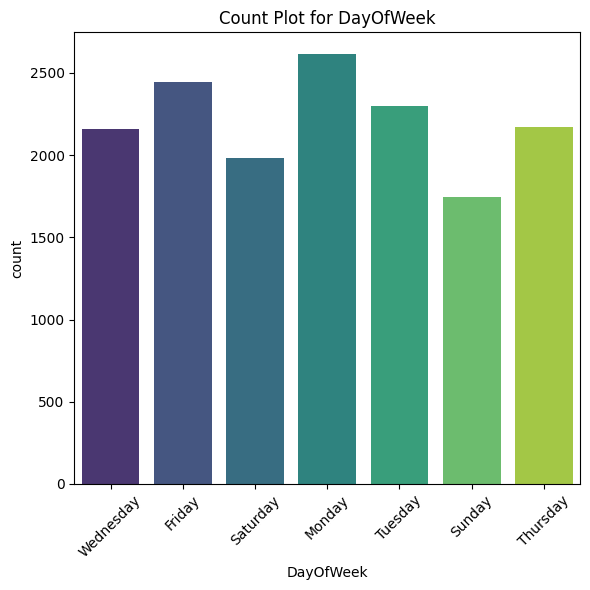

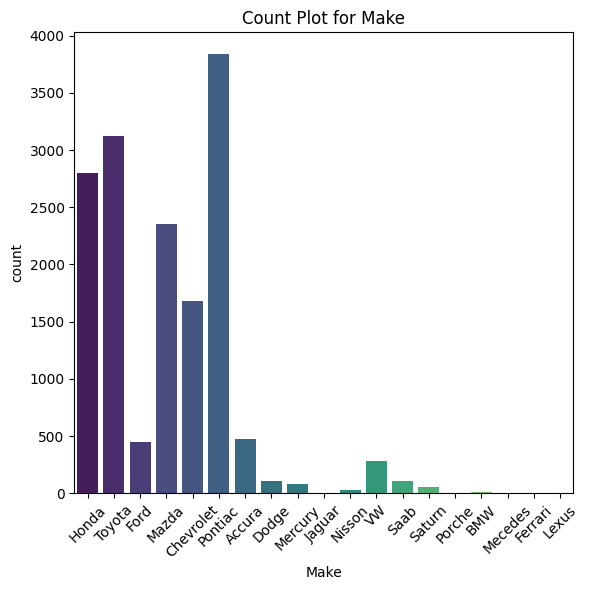

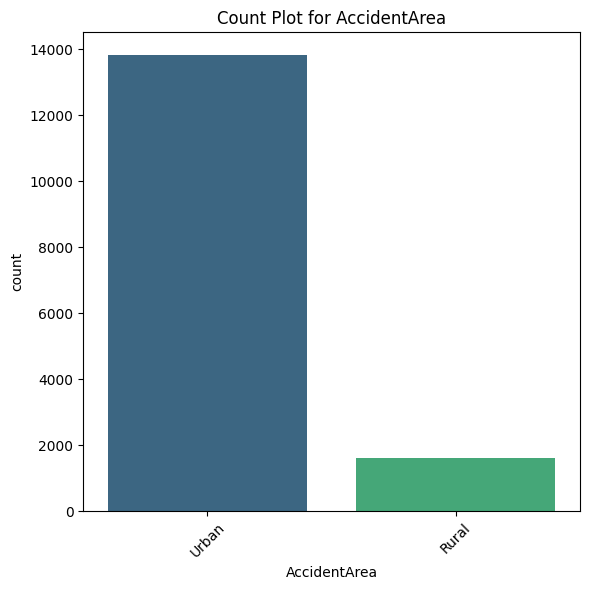

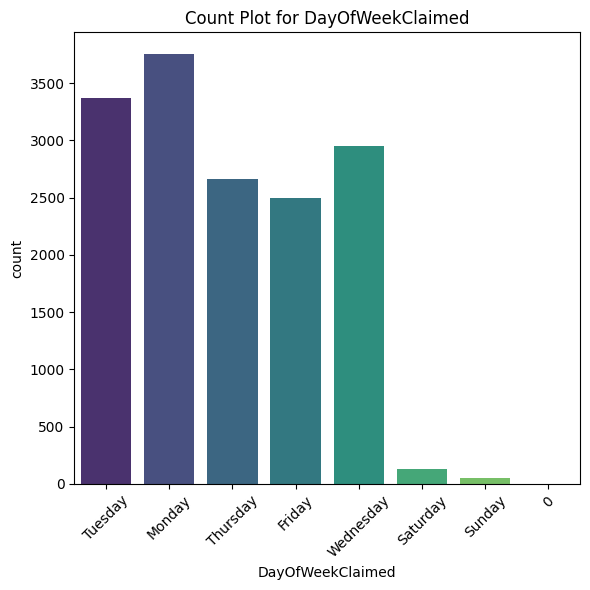

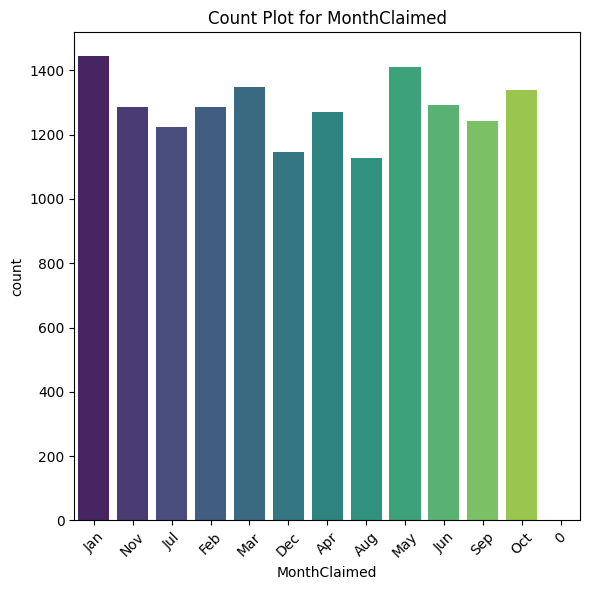

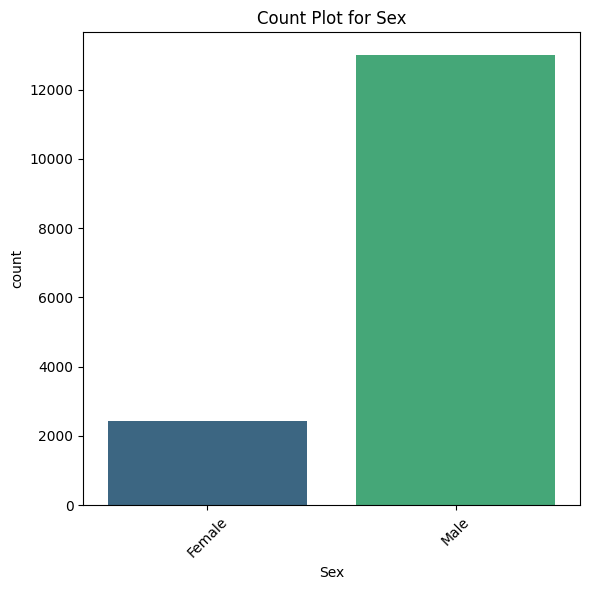

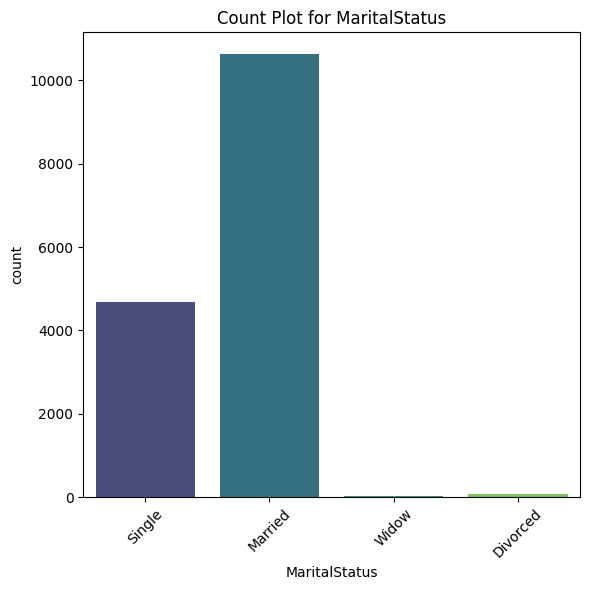

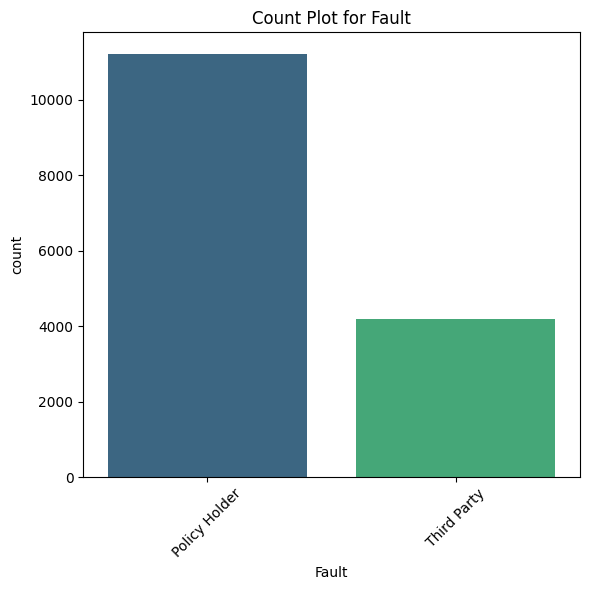

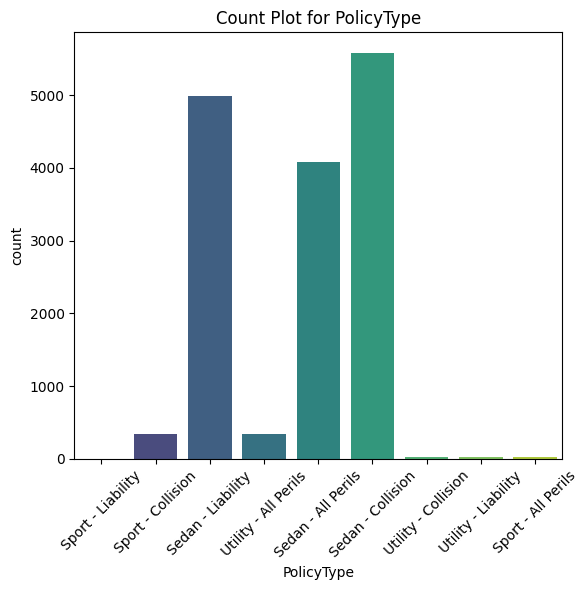

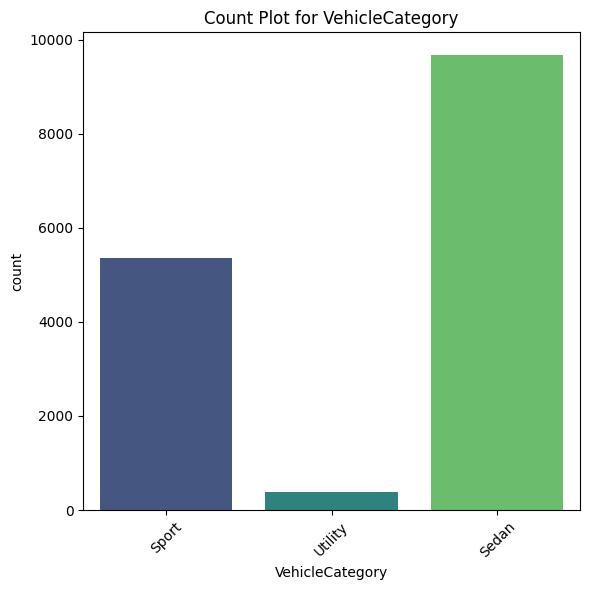

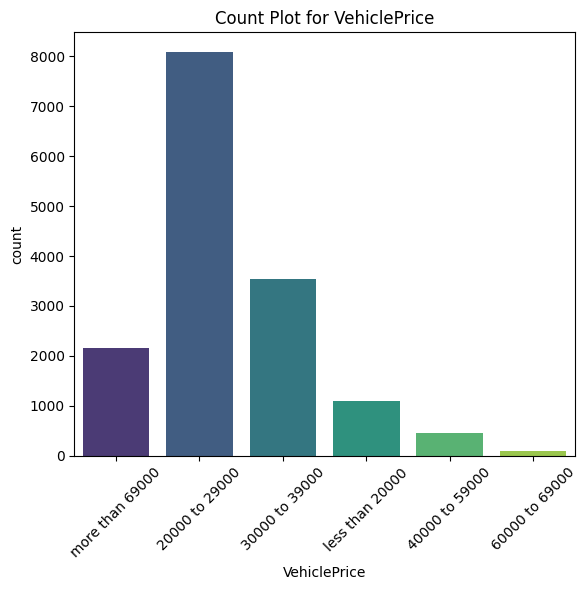

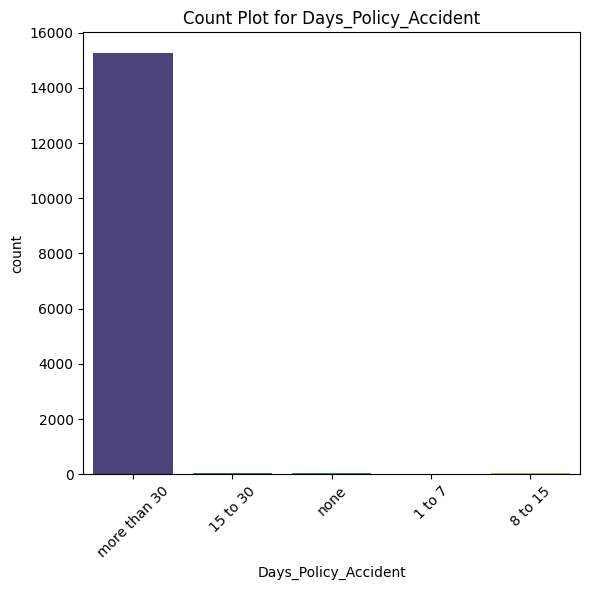

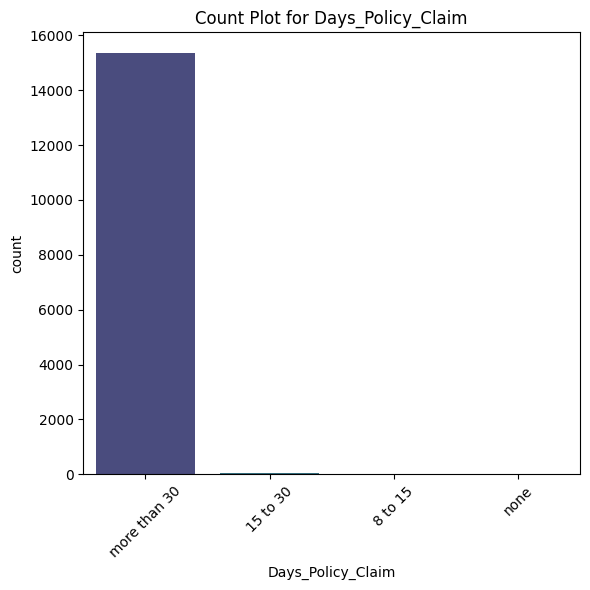

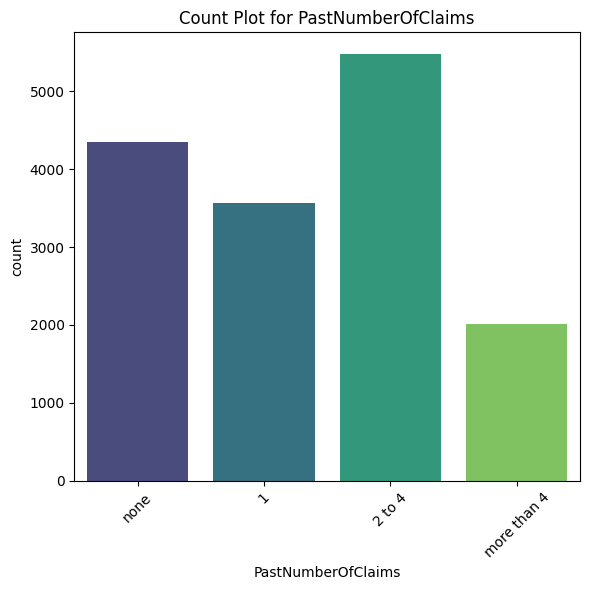

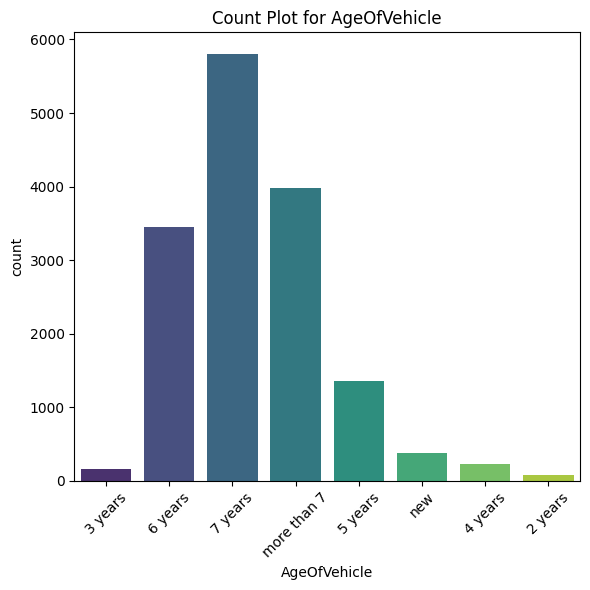

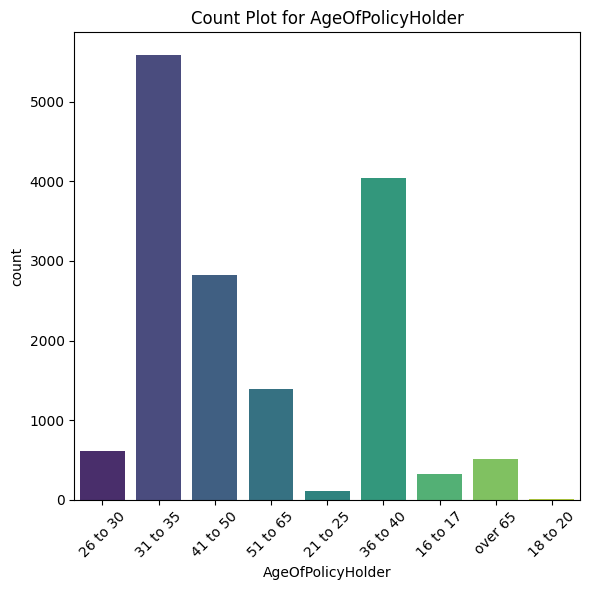

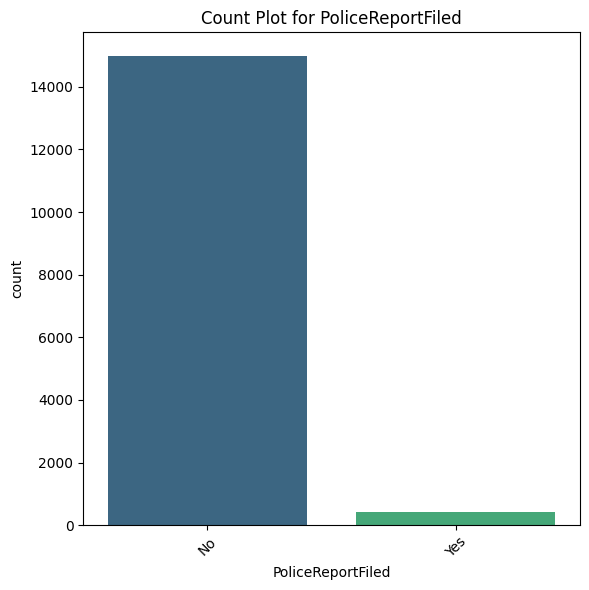

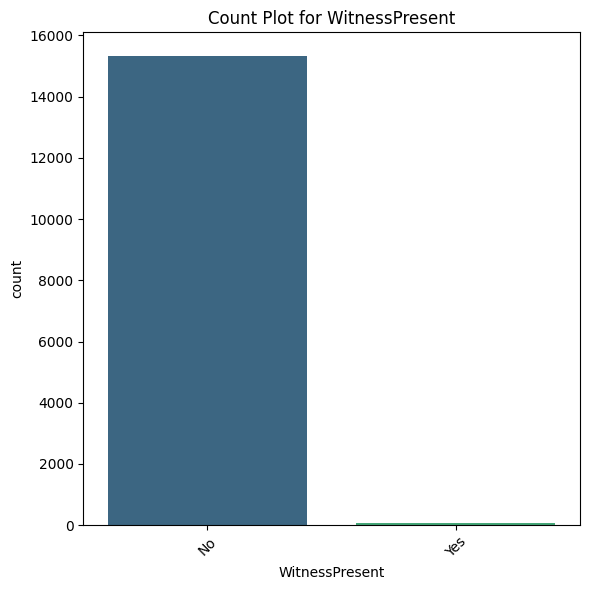

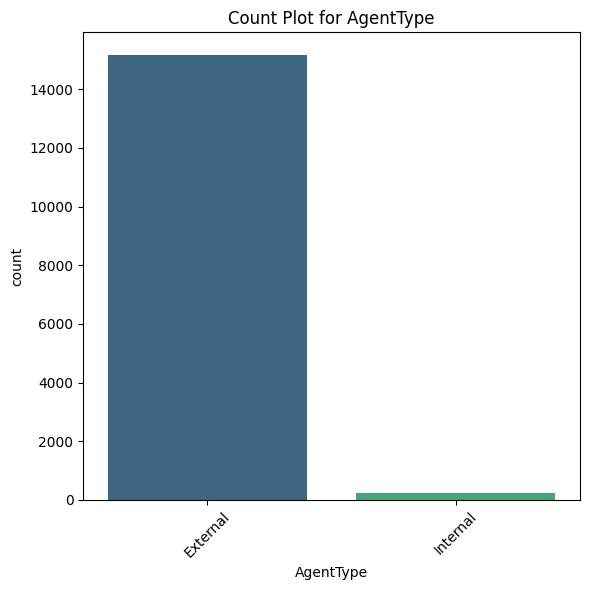

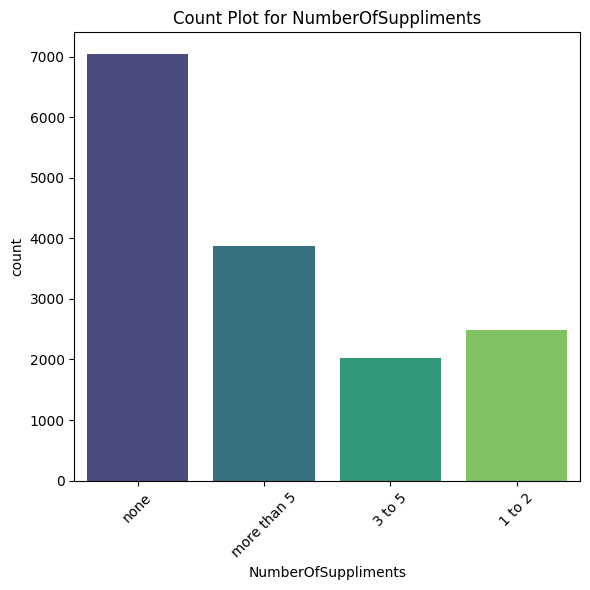

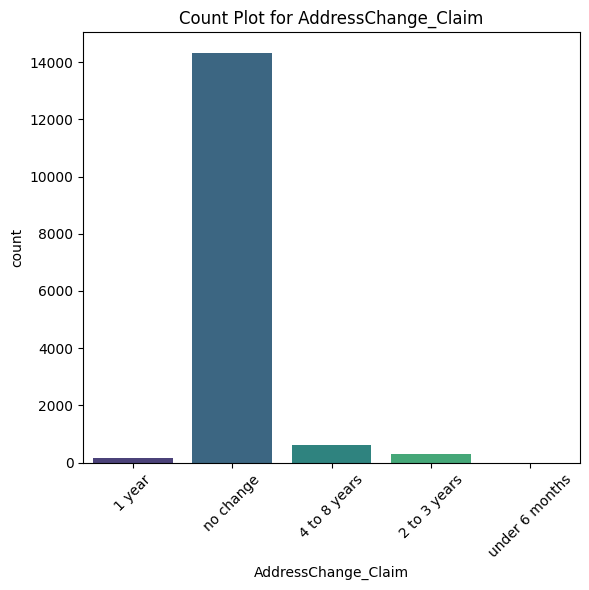

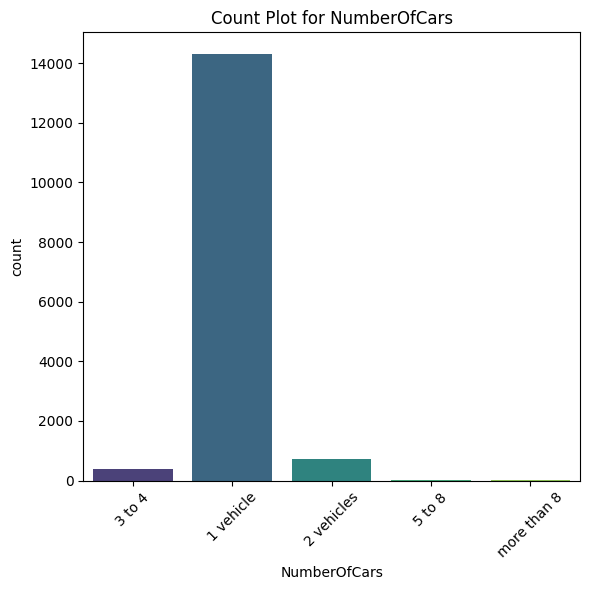

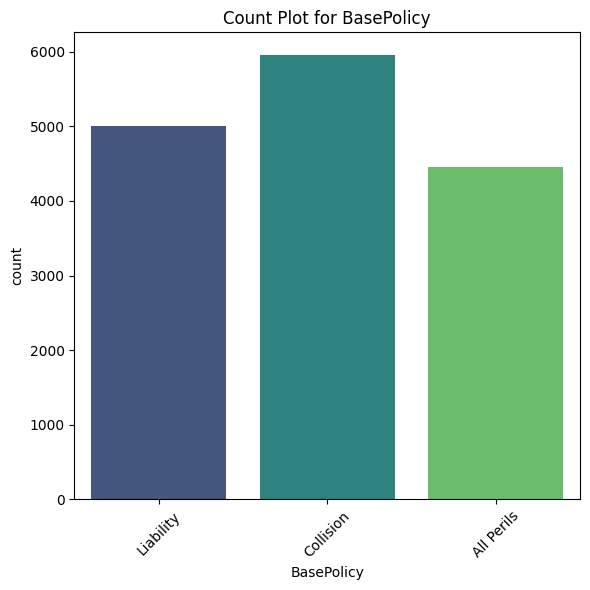

In [14]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=("object")).columns.tolist()

# Loop through categorical columns (skip first column if needed)
for col in categorical_columns[1:]:
    plt.figure(figsize=(6, 6))   #  plt.Figure →  plt.figure
    sns.countplot(data=df, x=col, hue=col, palette="viridis")
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

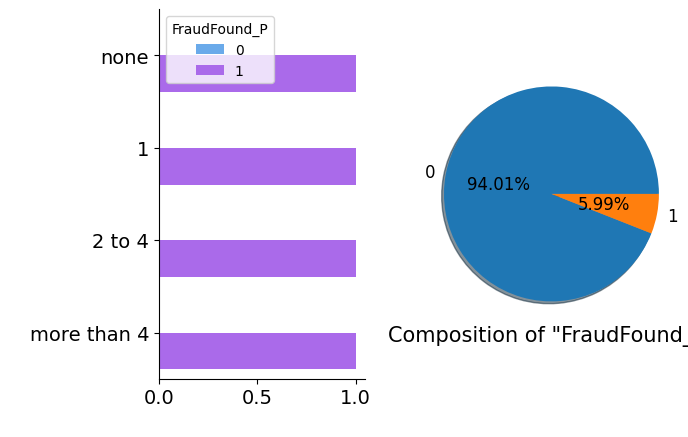

In [15]:
ax1 = plt.subplot(1,2,1)

cp = sns.barplot(
    x='FraudFound_P',
    y='PastNumberOfClaims',          # numeric column
    data=df,
    palette='cool',
    hue='FraudFound_P'
)

ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

# -------------------- pieplot --------------------
ax2 = plt.subplot(1,2,2)

plt.pie(
    x=df['FraudFound_P'].value_counts(),
    labels=list(df['FraudFound_P'].unique()),
    autopct='%2.2f%%',
    pctdistance=0.5,
    shadow=True,
    radius=1.3,
    textprops={'fontsize':12}
)

ax2.set_xlabel(" ")
plt.xlabel('Composition of "FraudFound_P"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

## Data Cleaning

In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

<Axes: >

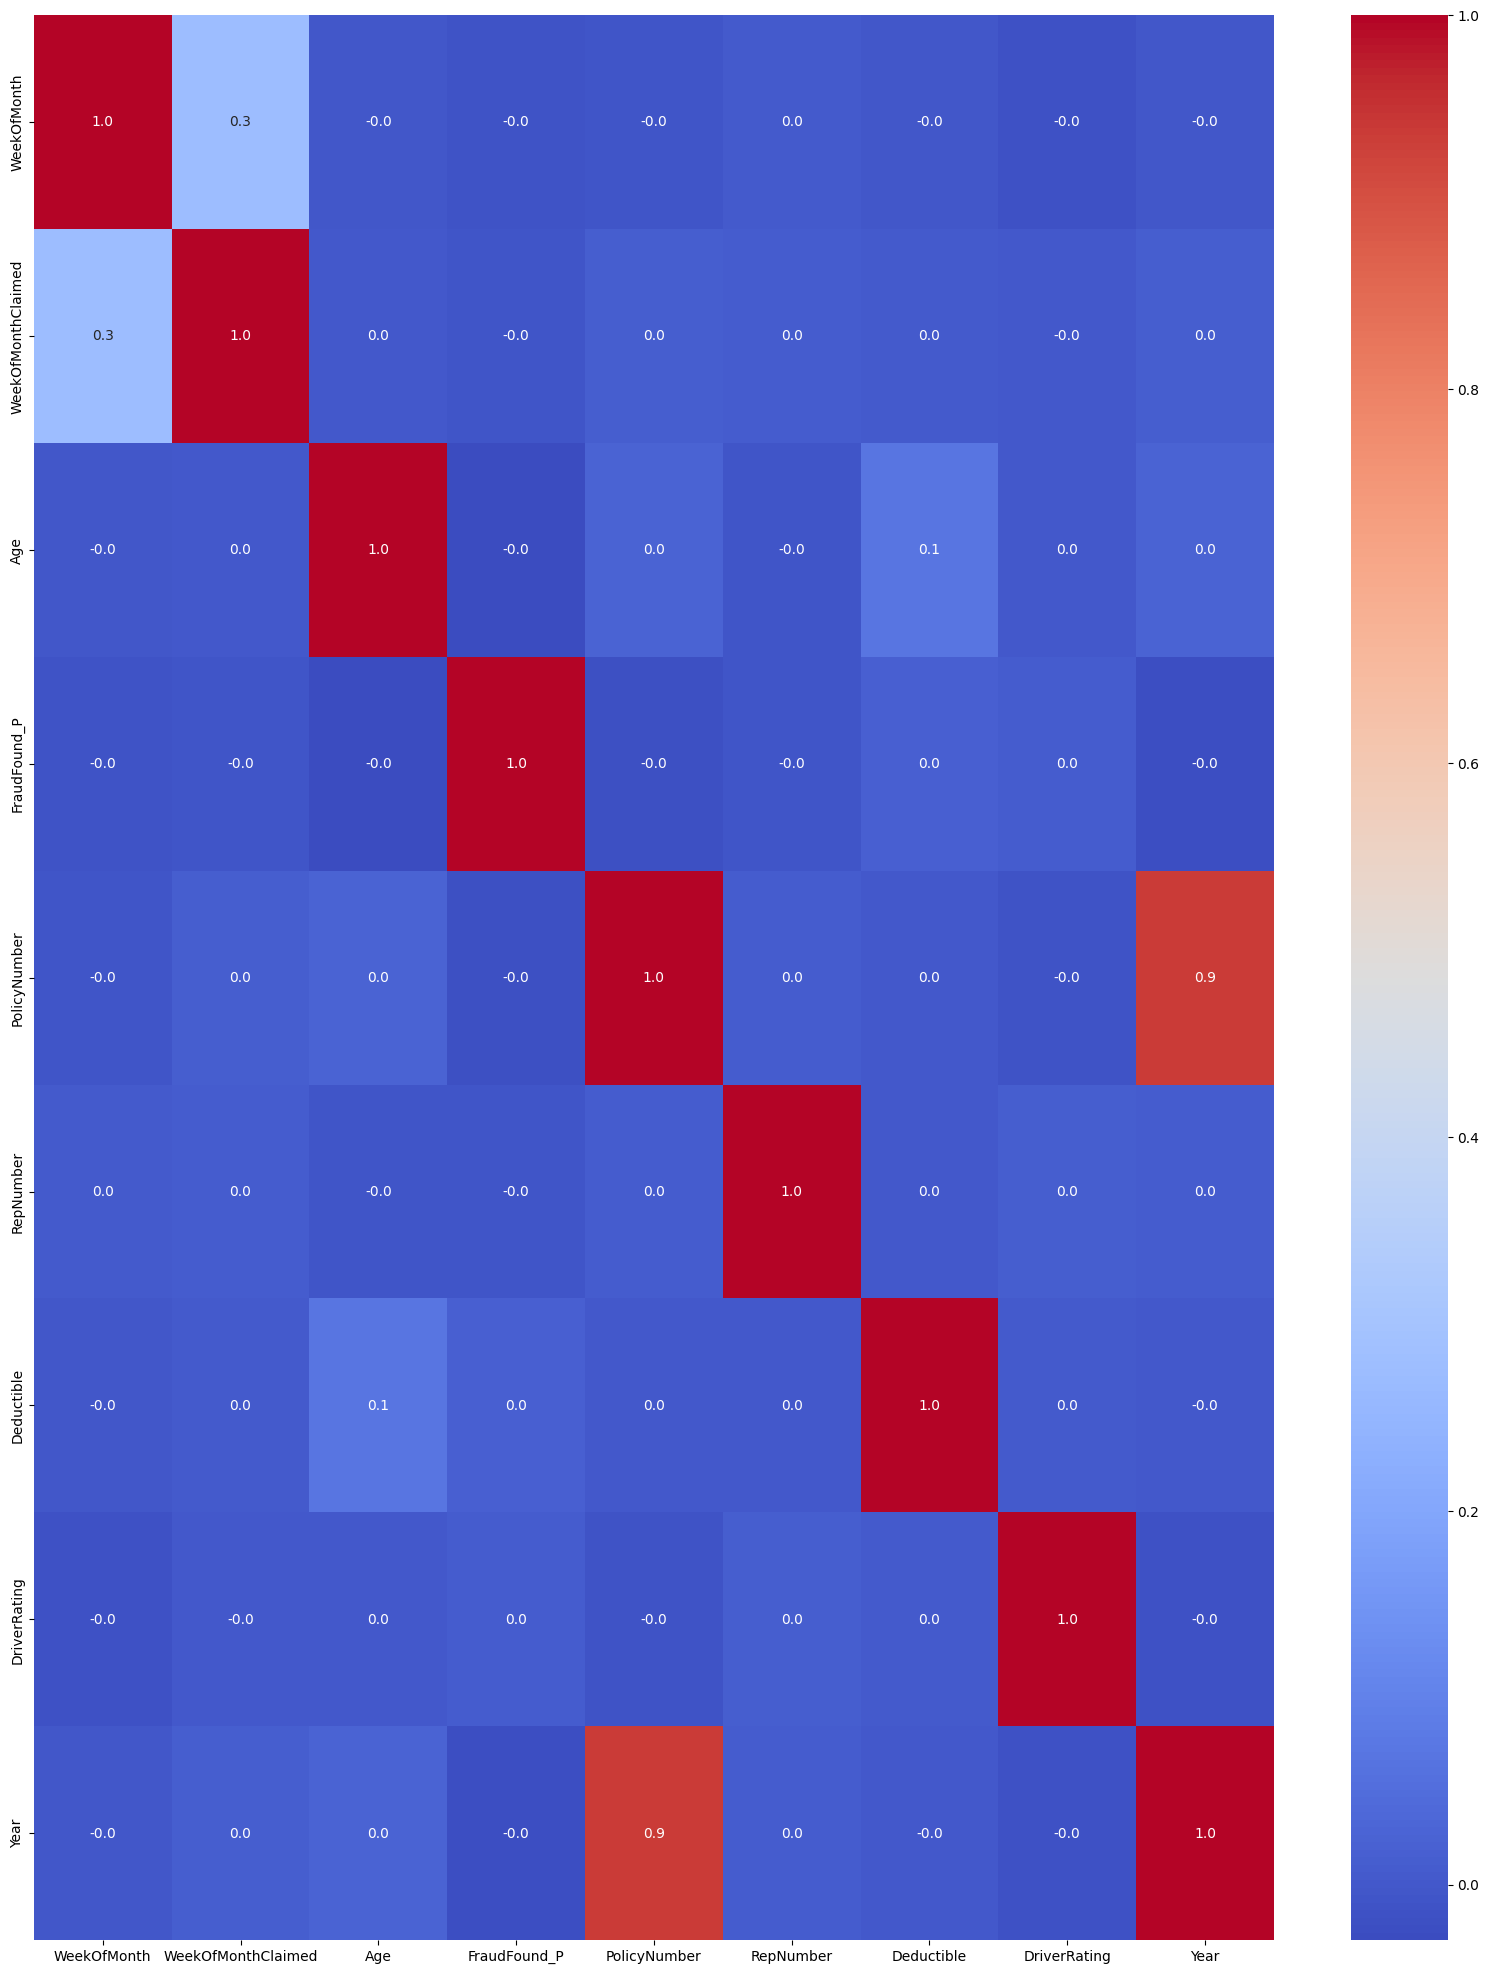

In [18]:
plt.figure(figsize=(20,25))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt="0.01f")

In [19]:
correlation_matrix = df.corr(numeric_only=True)

threshold =0.5 # set the correlation threshold

# Find pairs of features with high correlation

highly_correlation_pairs =[]
for i in range (len(correlation_matrix.columns)):
    for j in range(i):
        # check if the absolute correlation exceeds the threshold
        if abs(correlation_matrix.iloc[i,j])> threshold:
            highly_correlation_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
            
# print all pairs of highly correlation features

print(highly_correlation_pairs) 

[('Year', 'PolicyNumber')]


In [20]:
df.corr(numeric_only=True)["FraudFound_P"].sort_values(ascending=False) 

FraudFound_P          1.000000
Deductible            0.017348
DriverRating          0.007266
WeekOfMonthClaimed   -0.005761
RepNumber            -0.007551
WeekOfMonth          -0.011861
PolicyNumber         -0.020345
Year                 -0.024760
Age                  -0.029741
Name: FraudFound_P, dtype: float64

In [21]:
df.drop(columns="PolicyNumber",inplace=True)

## Data Transformation

Histogram

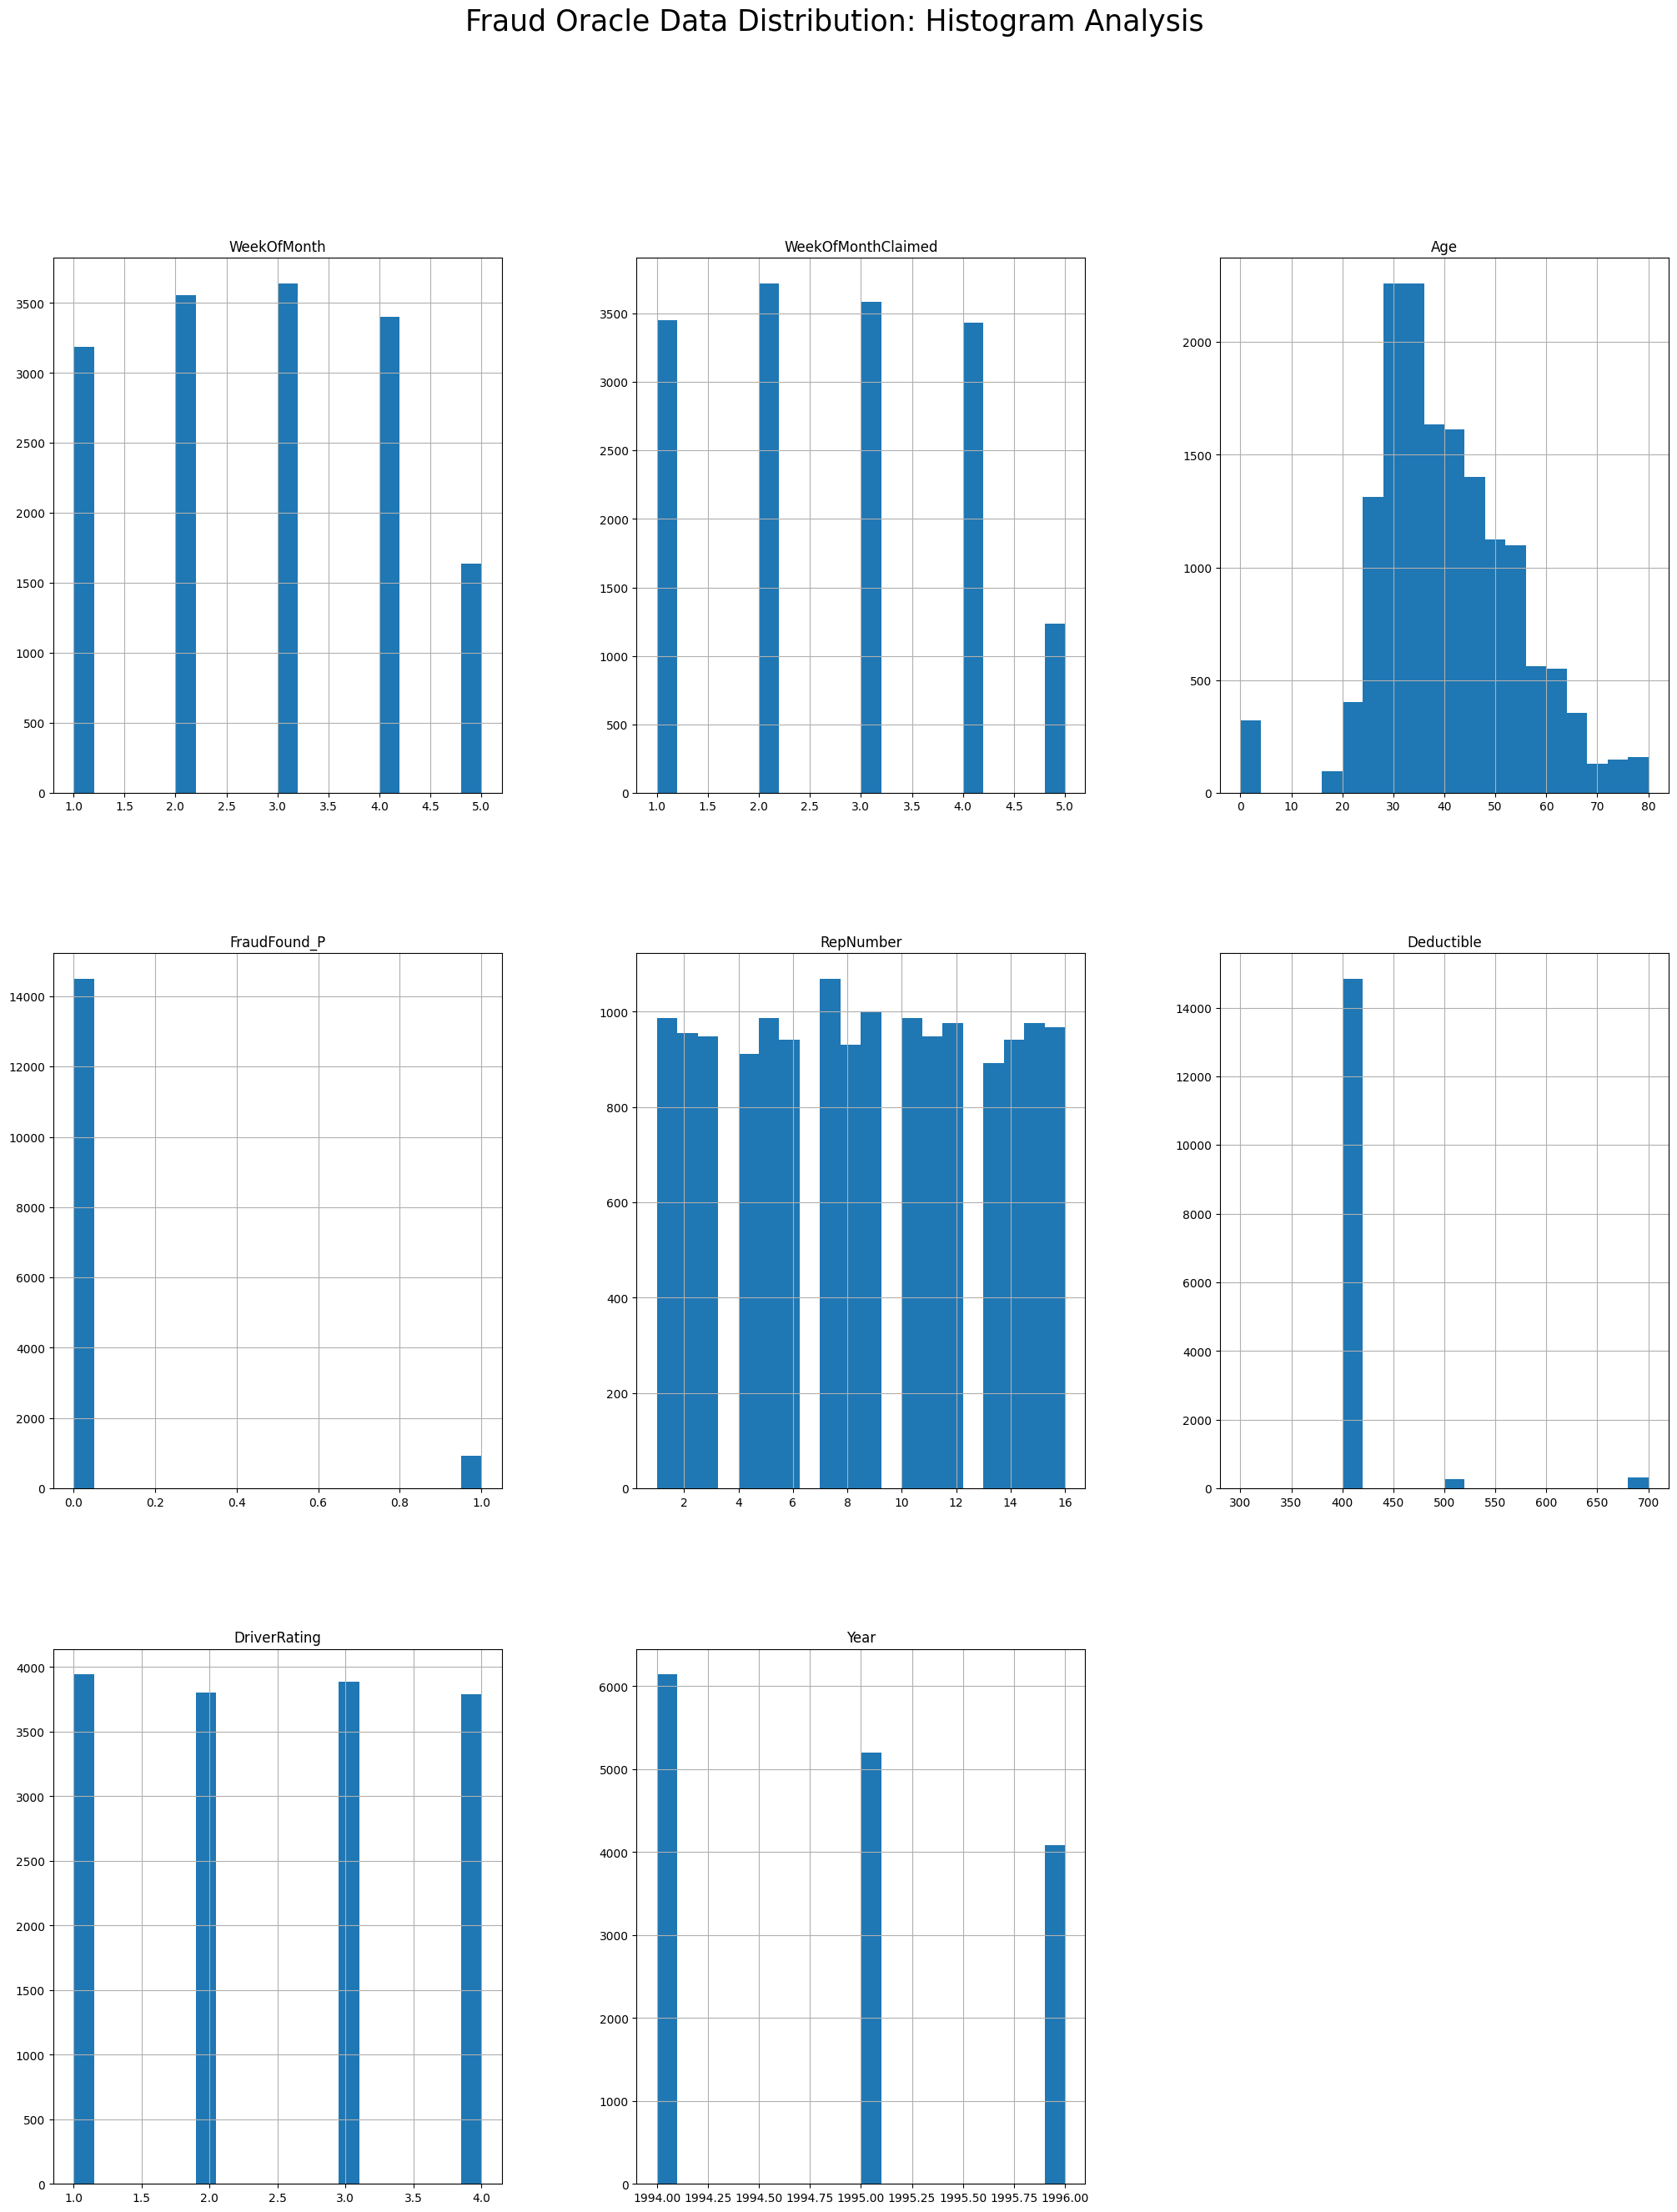

In [22]:
# Histogram plot
df.hist(bins=20, figsize=(25, 30))
plt.suptitle("Fraud Oracle Data Distribution: Histogram Analysis", fontsize=25)
plt.show()

In [23]:
# calculate skewness for each column

skewness = df.skew(numeric_only=True)

# sort the skewness values in ascending order

sorted_skewness = skewness.sort_values(ascending=True)

# Display the sorted skewness values

print(sorted_skewness)

RepNumber             0.006628
DriverRating          0.009283
WeekOfMonth           0.115426
Age                   0.152314
WeekOfMonthClaimed    0.158233
Year                  0.245689
FraudFound_P          3.711164
Deductible            6.078803
dtype: float64


In [24]:

df["FraudFound_P"] = np.log1p(df["FraudFound_P"]) 
df["Deductible"] = np.log1p(df["Deductible"]) 


In [25]:

df.skew(numeric_only=True)

WeekOfMonth           0.115426
WeekOfMonthClaimed    0.158233
Age                   0.152314
FraudFound_P          3.711164
RepNumber             0.006628
Deductible            5.817128
DriverRating          0.009283
Year                  0.245689
dtype: float64

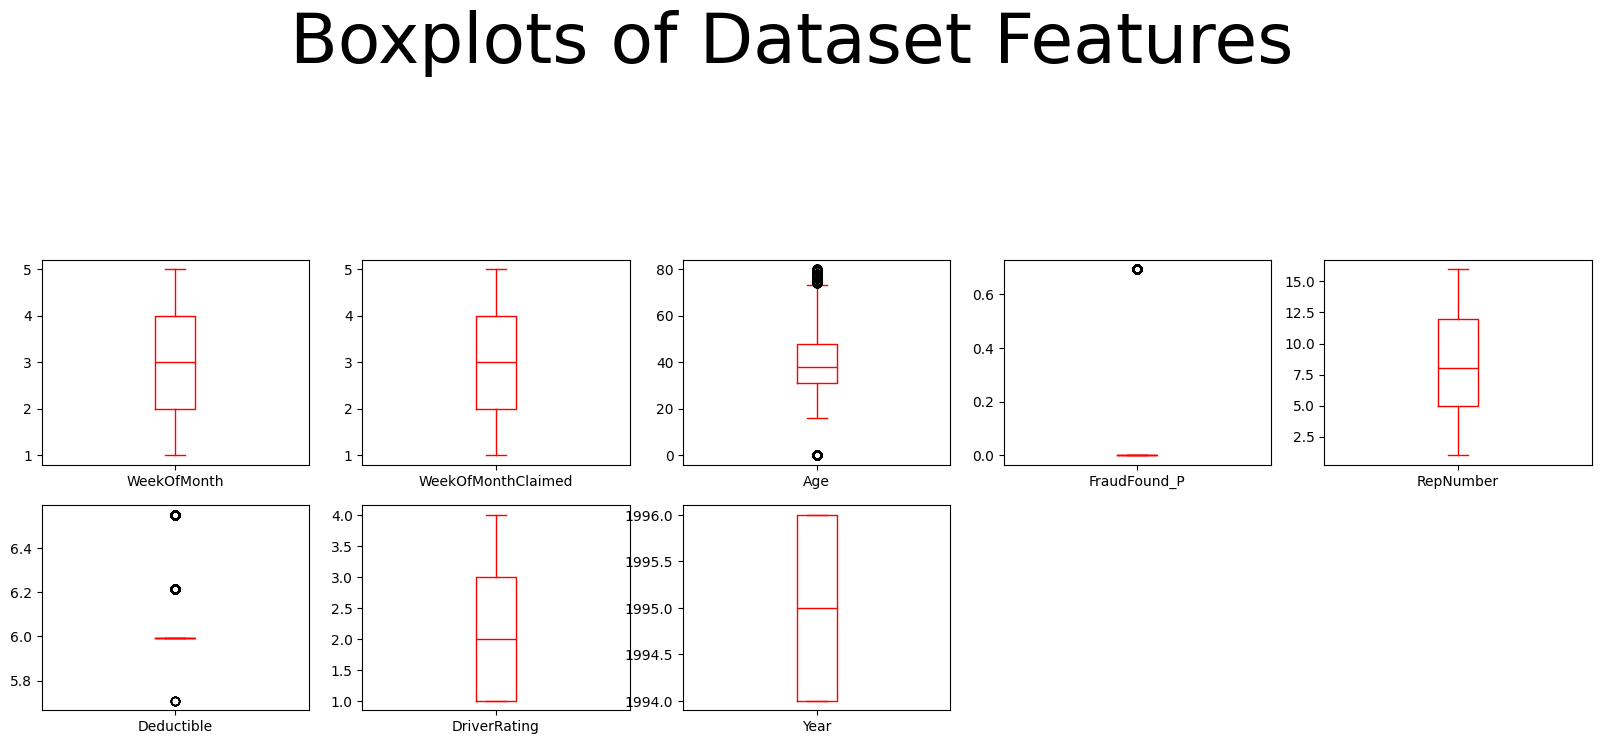

In [26]:
df.plot(kind="box",subplots=True,layout=(8,5),figsize=(20,25),color="red")
plt.suptitle("Boxplots of Dataset Features",fontsize=50)
plt.show()

In [27]:
def remove_outliers_iqr(df,exclude_columns):
    # Loop through numeric columns
    for column in df.select_dtypes(include=["int64","float64"]):
        if column in exclude_columns:
            continue # skip excluded columns
        
        Q1=df[column].quantile(0.25)
        Q3=df[column].quantile(0.75)
        IQR=Q3-Q1
        
        # Define outlier bounds
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR
        
        
        # Filter out the outliers
        
        df=df[(df[column] >=lower_bound) & (df[column] <= upper_bound)]
        
    return df 

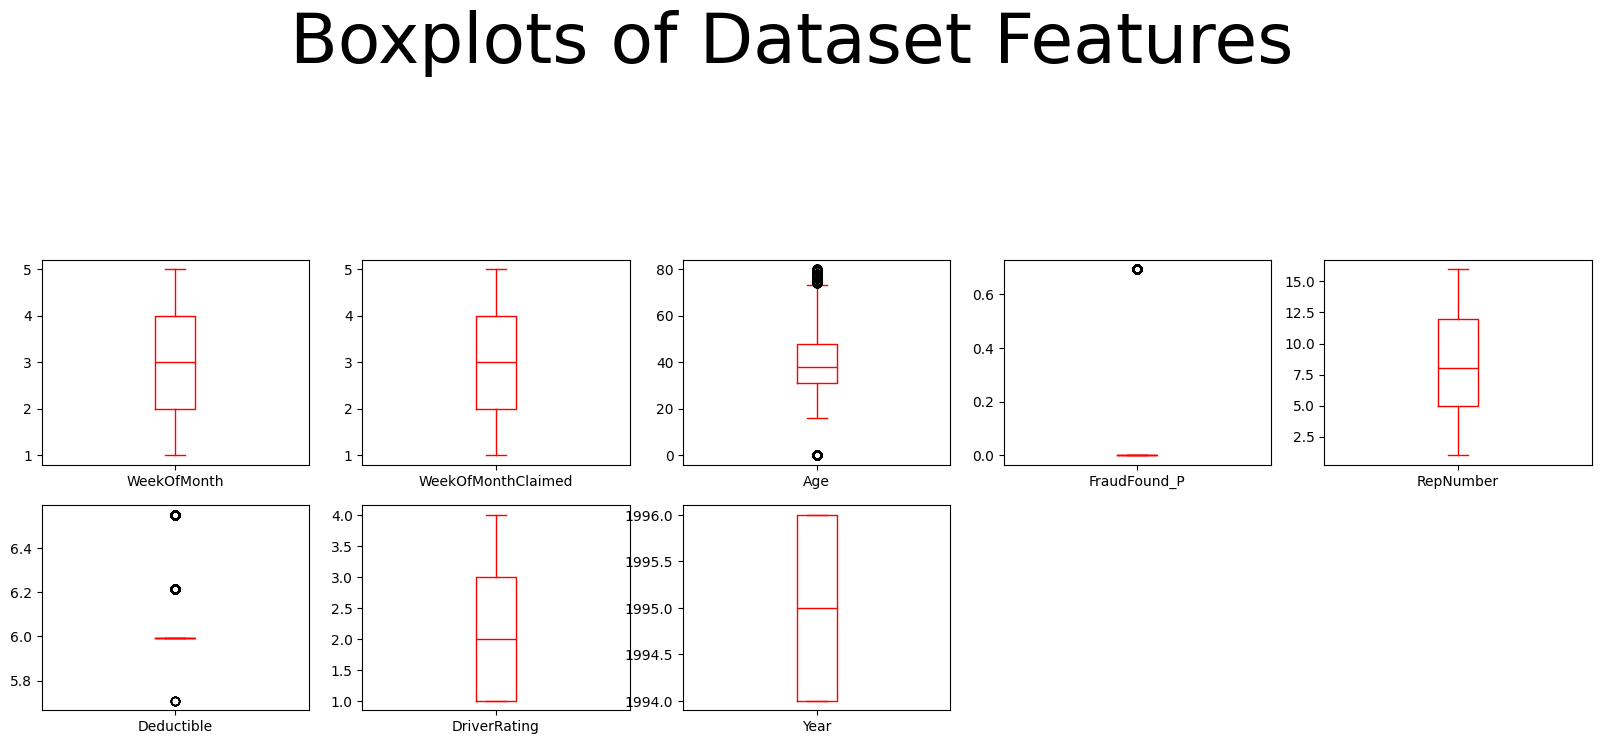

In [28]:
df.plot(kind="box",subplots=True,layout=(8,5),figsize=(20,25),color="red")
plt.suptitle("Boxplots of Dataset Features",fontsize=50)
plt.show()

In [29]:
df.skew(numeric_only=True)

WeekOfMonth           0.115426
WeekOfMonthClaimed    0.158233
Age                   0.152314
FraudFound_P          3.711164
RepNumber             0.006628
Deductible            5.817128
DriverRating          0.009283
Year                  0.245689
dtype: float64

## Encoding

In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [31]:

cat=df.select_dtypes(include="object")
cat

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,...,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,...,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,...,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,Third Party,Sedan - Liability,...,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,Third Party,Sport - Collision,...,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,Friday,Toyota,Urban,Tuesday,Nov,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
15416,Nov,Thursday,Pontiac,Urban,Friday,Dec,Male,Married,Policy Holder,Sedan - Liability,...,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability
15417,Nov,Thursday,Toyota,Rural,Friday,Dec,Male,Single,Policy Holder,Sedan - Collision,...,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision
15418,Dec,Monday,Toyota,Urban,Thursday,Dec,Female,Married,Third Party,Sedan - All Perils,...,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils


In [32]:

print(df["Sex"].unique())
print(df["PoliceReportFiled"].unique())
print(df["WitnessPresent"].unique())
print(df["Month"].unique())
print(df["DayOfWeek"].unique())
print(df["DayOfWeekClaimed"].unique())
print(df["MonthClaimed"].unique())
print(df["AgeOfVehicle"].unique())
print(df["AgeOfPolicyHolder"].unique())
print(df["NumberOfSuppliments"].unique())
print(df["AddressChange_Claim"].unique())
print(df["NumberOfCars"].unique())
# print(df[""].unique())


['Female' 'Male']
['No' 'Yes']
['No' 'Yes']
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
['3 years' '6 years' '7 years' 'more than 7' '5 years' 'new' '4 years'
 '2 years']
['26 to 30' '31 to 35' '41 to 50' '51 to 65' '21 to 25' '36 to 40'
 '16 to 17' 'over 65' '18 to 20']
['none' 'more than 5' '3 to 5' '1 to 2']
['1 year' 'no change' '4 to 8 years' '2 to 3 years' 'under 6 months']
['3 to 4' '1 vehicle' '2 vehicles' '5 to 8' 'more than 8']


In [33]:
print(df["DayOfWeekClaimed"].value_counts())
print(df["MonthClaimed"].value_counts())
print(df["NumberOfSuppliments"].value_counts())

DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: count, dtype: int64
MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: count, dtype: int64
NumberOfSuppliments
none           7047
more than 5    3867
1 to 2         2489
3 to 5         2017
Name: count, dtype: int64


In [34]:
df=df[df["DayOfWeekClaimed"]!="0"]
df=df[df["MonthClaimed"]!="0"]
df=df[df["NumberOfSuppliments"]!="none"]

In [35]:
print(df["DayOfWeekClaimed"].unique())
print(df["MonthClaimed"].unique())
print(df["NumberOfSuppliments"].unique())

['Friday' 'Wednesday' 'Monday' 'Tuesday' 'Thursday' 'Saturday' 'Sunday']
['Jul' 'Nov' 'Feb' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Mar' 'Jan' 'Oct' 'Sep']
['more than 5' '3 to 5' '1 to 2']


In [36]:
df["DayOfWeek"].value_counts()

DayOfWeek
Monday       1386
Friday       1348
Tuesday      1278
Thursday     1209
Wednesday    1161
Saturday     1079
Sunday        912
Name: count, dtype: int64

In [37]:

# Manual / Ordinal Encoding using map()

df['Sex'] = df['Sex'].map({'Female': 0,'Male': 1})

df['PoliceReportFiled'] = df['PoliceReportFiled'].map({ 'No': 0,'Yes': 1})

df['WitnessPresent'] = df['WitnessPresent'].map({ 'No': 0,'Yes': 1})

df["Month"] = df["Month"].map({"Jan":0,"Feb":1,"Mar":2,"Apr":3,"May":4,"Jun":5,"Jul":6,"Aug":7,"Sep":8,"Oct":9,"Nov":10,"Dec":11})
df["Month"].unique()

df['DayOfWeek'] = df['DayOfWeek'].map({'Sunday': 0,'Monday': 1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6 })
df["DayOfWeek"].unique()

df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].map({'Sunday': 0,'Monday': 1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6 })
df["DayOfWeekClaimed"].unique()

df["MonthClaimed"] = df["MonthClaimed"].map({"Jan":0,"Feb":1,"Mar":2,"Apr":3,"May":4,"Jun":5,"Jul":6,"Aug":7,"Sep":8,"Oct":9,"Nov":10,"Dec":11})
df["MonthClaimed"].unique()

# df['PastNumberOfClaims'] = df['PastNumberOfClaims'].map({'':0 })
# df["PastNumberOfClaims"].unique()

df['AgeOfVehicle'] = df['AgeOfVehicle'].map({'new':0,'2 years':1,'3 years':2,'4 years':3,'5 years':4,'6 years':5,'7 years':6,'more than 7':7})
df["AgeOfVehicle"].unique()

df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].map({'16 to 17':0,'18 to 20':1,'21 to 25':2,'26 to 30':3,'31 to 35':4,'36 to 40':5,'41 to 50':6,'51 to 65':7,'over 65':8})
df["AgeOfPolicyHolder"].unique()

df['NumberOfSuppliments'] = df['NumberOfSuppliments'].map({'1 to 2':0, '3 to 5':1,'more than 5':2 })
df["NumberOfSuppliments"].unique()

df['AddressChange_Claim'] = df['AddressChange_Claim'].map({'no change':0,'1 year':1,'2 to 3 years':2,'4 to 8 years':3,'under 6 months':4})
df["AddressChange_Claim"].unique()

df['NumberOfCars'] = df['NumberOfCars'].map({'1 vehicle':0,'2 vehicles':1,'3 to 4':2,'5 to 8':3,'more than 8':4})
df["NumberOfCars"].unique()

# df[''] = df[''].map({'':0 })
# df[""].unique()

# df[''] = df[''].map({'':0 })
# df[""].unique()

# df[''] = df[''].map({'':0 })
# df[""].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [38]:

print(df["Sex"].unique())
print(df["PoliceReportFiled"].unique())
print(df["WitnessPresent"].unique())
print(df["Month"].unique())
print(df["DayOfWeek"].unique())
print(df["DayOfWeekClaimed"].unique())
print(df["MonthClaimed"].unique())
print(df["AgeOfVehicle"].unique())
print(df["AgeOfPolicyHolder"].unique())
print(df["NumberOfSuppliments"].unique())
print(df["AddressChange_Claim"].unique())
print(df["NumberOfCars"].unique())



[1 0]
[1 0]
[0 1]
[ 5  9  1 11  3  6  7  2  4  0  8 10]
[6 5 2 0 1 4 3]
[5 3 1 2 4 6 0]
[ 6 10  1 11  3  7  4  5  2  0  9  8]
[7 4 6 5 3 1 2]
[7 2 5 4 3 6 8 1 0]
[2 1 0]
[0 2 3 1 4]
[0 2 1 3 4]


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8373 entries, 3 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 8373 non-null   int64  
 1   WeekOfMonth           8373 non-null   int64  
 2   DayOfWeek             8373 non-null   int64  
 3   Make                  8373 non-null   object 
 4   AccidentArea          8373 non-null   object 
 5   DayOfWeekClaimed      8373 non-null   int64  
 6   MonthClaimed          8373 non-null   int64  
 7   WeekOfMonthClaimed    8373 non-null   int64  
 8   Sex                   8373 non-null   int64  
 9   MaritalStatus         8373 non-null   object 
 10  Age                   8373 non-null   int64  
 11  Fault                 8373 non-null   object 
 12  PolicyType            8373 non-null   object 
 13  VehicleCategory       8373 non-null   object 
 14  VehiclePrice          8373 non-null   object 
 15  FraudFound_P          837

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [41]:
x=df.drop(columns="FraudFound_P")
y=df["FraudFound_P"]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [43]:
clas_models={"lr": LogisticRegression(max_iter=500),
             "rfc": RandomForestClassifier(),
             "dtc":DecisionTreeClassifier(),
             "knn":KNeighborsClassifier(n_neighbors=11),
             "svm":SVC(kernel="linear"),
             "gbc":GradientBoostingClassifier(random_state=0,learning_rate=0.45)}

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score


In [45]:
# Dictionary to store results
results= {"model":[],"Accuracy":[],"precision":[],"Recall":[],"f1-score":[]}

# Loop through the model , train then and calculate the matrics
for model_name,model in clas_models.items():
    # train the model
    model.fit(x_train,y_train)
    model_pred=model.predict(x_test)
    
    # calculate matrics
    Accuracy=accuracy_score(y_test,model_pred)
    precision=precision_score(y_test,model_pred)
    recall=recall_score(y_test,model_pred)
    f1=f1_score(y_test,model_pred)
    
    # store results in the dictionary
    
    results["model"].append(model)
    results["Accuracy"].append(Accuracy)
    results["precision"].append(precision)
    results["Recall"].append(recall)
    results["f1-score"].append(f1)
    
    # convert results to a DataFrame
    
results_df = pd.DataFrame(results)
    
    # sort by Accuracy
results_df=results_df.sort_values(by="Accuracy",ascending=False)
    
    # Display the stored DataFrame with background grandiant
results_df.style.background_gradient("Reds")

ValueError: could not convert string to float: 'Toyota'